<a href="https://colab.research.google.com/github/aashrey1234/ICDesign/blob/main/pytorch_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch

In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [3]:
x = torch.empty(3,4)
print(x)

tensor([[1.6635e+22, 7.3680e+28, 4.4248e+30, 1.8545e+25],
        [1.7539e+19, 1.6635e+22, 7.1434e+22, 7.4937e+31],
        [8.7693e-42, 2.2449e-39, 1.2511e-23, 2.5353e+30]])


In [4]:
y = torch.zeros(2,3)
print (y)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [5]:
torch.manual_seed(1700)
random1 = torch.rand(2,3)
print(random1)

torch.manual_seed(1700)
random2 = torch.rand(2,3)
print(random2)

tensor([[0.4108, 0.6337, 0.7440],
        [0.5806, 0.4241, 0.3567]])
tensor([[0.4108, 0.6337, 0.7440],
        [0.5806, 0.4241, 0.3567]])


In [8]:
x = torch.empty(2,2,3)
print(x.shape)
print(x)

y = torch.zeros_like(x)
print(y)

torch.Size([2, 2, 3])
tensor([[[2.1014e-15, 3.1376e-41, 2.1088e-15],
         [3.1376e-41, 0.0000e+00, 1.4013e-45]],

        [[0.0000e+00, 0.0000e+00, 3.2790e-43],
         [0.0000e+00, 0.0000e+00, 3.1211e-41]]])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


In [16]:
a = torch.rand((2,3), dtype = torch.float32) * 20
print(a)

b = a.to(torch.int32)
print(b)

tensor([[13.9108, 16.7361,  3.2608],
        [ 8.6154,  0.5050, 16.7801]])
tensor([[13, 16,  3],
        [ 8,  0, 16]], dtype=torch.int32)


In [21]:
twos = torch.ones(2,2) * 2
fours = twos * 2
power3 = twos ** 3
print(fours)
print(power3)

tensor([[4., 4.],
        [4., 4.]])
tensor([[8., 8.],
        [8., 8.]])


In [27]:
rand = torch.rand(2,4)
doubled = rand*(torch.ones(1,1)*2)   #torch.ones(1,4)
print(rand)
print(doubled)

tensor([[0.0083, 0.6233, 0.5654, 0.4145],
        [0.1018, 0.4817, 0.1772, 0.0437]])
tensor([[0.0165, 1.2466, 1.1308, 0.8290],
        [0.2037, 0.9633, 0.3544, 0.0875]])


In [29]:
#broadcasting
a = torch.ones(3,3,2)
b = a * torch.rand( 3,1)
print(b)

tensor([[[0.2064, 0.2064],
         [0.8357, 0.8357],
         [0.3729, 0.3729]],

        [[0.2064, 0.2064],
         [0.8357, 0.8357],
         [0.3729, 0.3729]],

        [[0.2064, 0.2064],
         [0.8357, 0.8357],
         [0.3729, 0.3729]]])


In [3]:
#checking GPU
if torch.cuda.is_available():
  print('GPU')
else:
  print('CPU')

GPU


In [9]:
tensor = torch.arange(12)
tensor = tensor.reshape(4,-1)
tensor

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [11]:
tensor = tensor.view(2,6)
tensor


tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

In [13]:
tensor[0,2] = 3
tensor

tensor([[ 0,  1,  3,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

In [39]:
#slices
tensor1 = torch.arange(10)
tensor2 = tensor1.reshape(2,-1)
print(tensor2)
#tensor2[:,3:]
tensor3 = tensor2[:,3:]
tensor3 =  tensor3[:,0]
tensor3 = tensor3.reshape(-1,1)
tensor3

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


tensor([[3],
        [8]])

In [45]:
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([2,3,4,5])
tensor_a = tensor_a/tensor_b
tensor_a*tensor_b
tensor_a%tensor_b
tensor_a**tensor_b

tensor([0.2500, 0.2963, 0.3164, 0.3277])

In [18]:
import torch.nn as nn
import torch.nn.functional as F

In [19]:
class Model(nn.Module):
  def __init__(self,in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [20]:
torch.manual_seed(2)
model = Model()

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [44]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [48]:
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [50]:
#train test split. Set x,y
X = my_df.drop('species',axis=1)
y = my_df['species']

In [28]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
import numpy as np
X = X.values
y = y.values
y


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [52]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [59]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)


In [61]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [67]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.1023727655410767
Epoch: 10 and loss: 0.9072598218917847
Epoch: 20 and loss: 0.6056726574897766
Epoch: 30 and loss: 0.36808711290359497
Epoch: 40 and loss: 0.22174078226089478
Epoch: 50 and loss: 0.12580609321594238
Epoch: 60 and loss: 0.07870208472013474
Epoch: 70 and loss: 0.05753243714570999
Epoch: 80 and loss: 0.04651223495602608
Epoch: 90 and loss: 0.039703890681266785


Text(0.5, 0, 'Epoch')

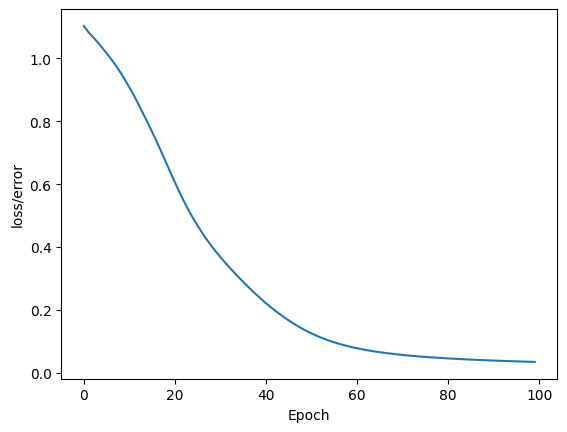

In [68]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [69]:
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)


In [70]:
loss

tensor(0.1306)

In [74]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()} ')

    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'we got {correct} correct')

1.) tensor([-6.6039,  2.5730,  6.0911]) 	 2 	 2 
2.) tensor([-9.0147,  1.1697,  9.6010]) 	 2 	 2 
3.) tensor([-9.6058,  1.8333,  9.8597]) 	 2 	 2 
4.) tensor([-3.1502,  5.5536,  0.4674]) 	 1 	 1 
5.) tensor([-7.8911,  2.3918,  7.6210]) 	 2 	 2 
6.) tensor([-1.5796,  5.4584, -1.1141]) 	 1 	 1 
7.) tensor([-6.0731,  3.2596,  5.0857]) 	 2 	 2 
8.) tensor([-2.8343,  5.7699, -0.0170]) 	 1 	 1 
9.) tensor([-6.8910,  2.8956,  6.2089]) 	 2 	 2 
10.) tensor([-9.4206,  1.3143,  9.9619]) 	 2 	 2 
11.) tensor([-5.5985,  3.5875,  4.3602]) 	 2 	 2 
12.) tensor([ 7.9954,  1.5206, -8.2266]) 	 0 	 0 
13.) tensor([ 7.1670,  1.3879, -7.3503]) 	 0 	 0 
14.) tensor([-0.5883,  4.4043, -1.5057]) 	 1 	 1 
15.) tensor([ 7.0888,  1.7331, -7.5013]) 	 0 	 0 
16.) tensor([-5.2877,  4.0717,  3.7292]) 	 2 	 1 
17.) tensor([ 7.4321,  1.4765, -7.6648]) 	 0 	 0 
18.) tensor([-6.1825,  3.0757,  5.3185]) 	 1 	 2 
19.) tensor([ 7.7075,  1.4478, -7.9024]) 	 0 	 0 
20.) tensor([ 6.3912,  1.3633, -6.6128]) 	 0 	 0 
21.) tens

In [78]:
new_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [79]:
with torch.no_grad():
  print(model(new_iris))


tensor([-6.3878,  2.8779,  5.6613])


In [80]:
#save our model
torch.save(model.state_dict(), 'my_wesome_iris_model.pt')

In [81]:
new_model = Model()
new_model.load_state_dict(torch.load('my_wesome_iris_model.pt'))

<All keys matched successfully>

In [82]:
new_model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)